In [1]:
from math import sqrt
from scipy import stats

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from pydataset import data

---
# Variance & Standard Deviation

In [2]:
example_one = np.array([-10, 0, 10, 20, 30])
example_one

array([-10,   0,  10,  20,  30])

In [3]:
example_one.mean()

10.0

In [4]:
example_two = np.array([8, 9, 10, 11, 12])
example_two

array([ 8,  9, 10, 11, 12])

In [5]:
example_two.mean()

10.0

In [6]:
# numpy variance
example_one.var()

200.0

In [7]:
# numpy variance
example_two.var()

2.0

In [8]:
# manually calculating variance for example_one
((example_one[0] - example_one.mean()) ** 2 + (example_one[1] - example_one.mean()) ** 2 + (example_one[2] - example_one.mean()) ** 2 + (example_one[3] - example_one.mean()) ** 2 + (example_one[4] - example_one.mean()) ** 2) / len(example_one)

200.0

In [9]:
# manually calculating variance for example_two
((example_two[0] - example_two.mean()) ** 2 + (example_two[1] - example_two.mean()) ** 2 + (example_two[2] - example_two.mean()) ** 2 + (example_two[3] - example_two.mean()) ** 2 + (example_two[4] - example_two.mean()) ** 2) / len(example_two)


2.0

In [10]:
# manually calculating standard deviation for example_one
sqrt(((example_one[0] - example_one.mean()) ** 2 + (example_one[1] - example_one.mean()) ** 2 + (example_one[2] - example_one.mean()) ** 2 + (example_one[3] - example_one.mean()) ** 2 + (example_one[4] - example_one.mean()) ** 2) / len(example_one))

14.142135623730951

In [11]:
# manually calculating standard deviation for example_two
sqrt(((example_two[0] - example_two.mean()) ** 2 + (example_two[1] - example_two.mean()) ** 2 + (example_two[2] - example_two.mean()) ** 2 + (example_two[3] - example_two.mean()) ** 2 + (example_two[4] - example_two.mean()) ** 2) / len(example_two))

1.4142135623730951

---
# Simulation Exercises

#### 1. How likely is it that you roll doubles when rolling two dice?

In [12]:
# represent your data
# create a matrix
n_simulations = 10_000
n_trials = 2 # dice

dice_rolls = pd.DataFrame(np.random.choice(range(1,7), size=(n_simulations, n_trials)))
dice_rolls

,0,1
0,5,3
1,3,6
2,5,3
3,2,1
4,4,5
...,...,...
9995,3,3
9996,5,3
9997,5,4
9998,6,6


In [13]:
# aggregate by row
dice_rolls["doubles"] = dice_rolls[0] == dice_rolls[1]
dice_rolls

,0,1,doubles
0,5,3,False
1,3,6,False
2,5,3,False
3,2,1,False
4,4,5,False
...,...,...,...
9995,3,3,True
9996,5,3,False
9997,5,4,False
9998,6,6,True


In [14]:
# aggregate for probability
(dice_rolls["doubles"] == True).mean()

0.1598

#### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads?

In [15]:
# represent your data
# create a matrix
n_simulations = 10_000
n_trials = 8 # coins

# 0 represents tails; 1 represents heads
coin_flips = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials)))
coin_flips

,0,1,2,3,4,5,6,7
0,1,1,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0
2,1,1,0,1,1,1,0,1
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
9995,1,1,0,0,1,1,0,1
9996,0,1,1,1,0,1,1,1
9997,1,0,1,0,0,1,1,0
9998,1,0,0,1,1,1,0,1


In [16]:
# aggregate by row
coin_flips["total_heads"] = coin_flips.sum(axis=1)
coin_flips

,0,1,2,3,4,5,6,7,total_heads
0,1,1,1,0,1,0,1,0,5
1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,1,1,0,1,6
3,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...
9995,1,1,0,0,1,1,0,1,5
9996,0,1,1,1,0,1,1,1,6
9997,1,0,1,0,0,1,1,0,4
9998,1,0,0,1,1,1,0,1,5


In [17]:
# aggregate for probability
(coin_flips["total_heads"] == 3).mean()

0.2127

#### If you flip 8 coins, what is the probability of getting more than 3 heads?

In [18]:
# aggregate for probability
(coin_flips["total_heads"] > 3).mean()

0.6416

#### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [19]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 2 # billboards

# 0 represents web dev students; 1 represents data sci students
billboards = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[3/4, 1/4]))
billboards

,0,1
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
9995,0,1
9996,0,0
9997,0,0
9998,0,0


In [20]:
# aggregate by row
billboards["total_data_sci"] = billboards.sum(axis=1)
billboards

,0,1,total_data_sci
0,1,0,1
1,1,0,1
2,1,0,1
3,0,0,0
4,0,0,0
...,...,...,...
9995,0,1,1
9996,0,0,0
9997,0,0,0
9998,0,0,0


In [21]:
# aggregate for probability
(billboards["total_data_sci"] == 2).mean()

0.0643

#### 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [22]:
# represent data
# create matrix
mean = 3
std = 1.5
n_simulations = 10_000
n_trials = 5 # weekdays

poptarts = np.round(np.random.normal(mean, std, size=(n_simulations, n_trials)))
poptarts

array([[ 1.,  5.,  6.,  2.,  2.],
       [ 0.,  3.,  5.,  2.,  4.],
       [ 4.,  2.,  2.,  3.,  3.],
       ...,
       [ 1.,  4.,  1.,  3.,  1.],
       [ 6.,  5.,  4.,  6.,  7.],
       [ 2.,  7.,  2., -0.,  2.]])

In [23]:
poptarts = pd.DataFrame(poptarts)
poptarts

,0,1,2,3,4
0,1.0,5.0,6.0,2.0,2.0
1,0.0,3.0,5.0,2.0,4.0
2,4.0,2.0,2.0,3.0,3.0
3,5.0,1.0,4.0,1.0,2.0
4,4.0,3.0,4.0,5.0,2.0
...,...,...,...,...,...
9995,5.0,4.0,2.0,2.0,2.0
9996,4.0,1.0,4.0,2.0,2.0
9997,1.0,4.0,1.0,3.0,1.0
9998,6.0,5.0,4.0,6.0,7.0


In [24]:
poptarts = pd.DataFrame(np.where(poptarts < 0, 0, poptarts))
poptarts

,0,1,2,3,4
0,1.0,5.0,6.0,2.0,2.0
1,0.0,3.0,5.0,2.0,4.0
2,4.0,2.0,2.0,3.0,3.0
3,5.0,1.0,4.0,1.0,2.0
4,4.0,3.0,4.0,5.0,2.0
...,...,...,...,...,...
9995,5.0,4.0,2.0,2.0,2.0
9996,4.0,1.0,4.0,2.0,2.0
9997,1.0,4.0,1.0,3.0,1.0
9998,6.0,5.0,4.0,6.0,7.0


In [25]:
# aggregate by row
poptarts["weekly_consumption"] = poptarts.sum(axis=1)
poptarts

,0,1,2,3,4,weekly_consumption
0,1.0,5.0,6.0,2.0,2.0,16.0
1,0.0,3.0,5.0,2.0,4.0,14.0
2,4.0,2.0,2.0,3.0,3.0,14.0
3,5.0,1.0,4.0,1.0,2.0,13.0
4,4.0,3.0,4.0,5.0,2.0,18.0
...,...,...,...,...,...,...
9995,5.0,4.0,2.0,2.0,2.0,15.0
9996,4.0,1.0,4.0,2.0,2.0,13.0
9997,1.0,4.0,1.0,3.0,1.0,10.0
9998,6.0,5.0,4.0,6.0,7.0,28.0


In [26]:
# aggregate for probabilty
(poptarts["weekly_consumption"] < 17).mean()

0.6696

#### Exercise 5
5. Compare Heights:
    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - If a man and woman are chosen at random, P(woman taller than man)?

In [27]:
# represent data
m_mean = 178
m_std = 8

f_mean = 170
f_std = 6

# create matrices
n_simulations = 10_000

men = pd.DataFrame(np.random.normal(m_mean, m_std, size=(n_simulations)))
women = pd.DataFrame(np.random.normal(f_mean, f_std, size=(n_simulations)))

# aggregate by row
women > men

# aggregate for probability
(women > men).mean()

0    0.2164
dtype: float64

#### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue?

In [28]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 50 # students

# 0 is fail; 1 is pass
conda_dls = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[1/250, 249/250]))
conda_dls

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9996,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
# aggregate by row
conda_dls["total_dls"] = conda_dls.sum(axis=1)
conda_dls

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,total_dls
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,49
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9996,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,49
9997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,49
9998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50


In [30]:
# aggregate for probability
(conda_dls["total_dls"] == 50).mean()

0.8166

#### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [31]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 3 # three days

# 0 is no food trucks; 1 is food trucks
food_trucks = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[.3, .7]))
food_trucks

,0,1,2
0,1,1,1
1,0,1,0
2,1,1,1
3,0,0,0
4,1,0,1
...,...,...,...
9995,1,1,0
9996,0,1,1
9997,1,1,1
9998,1,0,1


In [32]:
# aggregate by row
food_trucks["total_trucks_over_three_days"] = food_trucks.sum(axis=1)
food_trucks

,0,1,2,total_trucks_over_three_days
0,1,1,1,3
1,0,1,0,1
2,1,1,1,3
3,0,0,0,0
4,1,0,1,2
...,...,...,...,...
9995,1,1,0,2
9996,0,1,1,2
9997,1,1,1,3
9998,1,0,1,2


In [33]:
# aggregate for probability
(food_trucks["total_trucks_over_three_days"] == 0).mean()

0.0265

#### 8. If 23 people are in the same room, what are the odds that two of them share a birthday?

In [34]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 23 # people

birthdays = pd.DataFrame(np.random.choice(range(0, 365), size=(n_simulations, n_trials)))
birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,317,239,321,95,211,258,188,93,123,159,...,325,286,295,283,290,244,356,322,120,185
1,58,158,295,47,207,117,122,159,177,210,...,45,130,107,241,361,114,49,8,173,21
2,291,136,293,329,143,185,220,347,272,59,...,306,281,330,254,220,96,267,105,139,228
3,267,10,100,272,0,93,232,221,348,125,...,331,90,134,283,6,283,130,133,103,78
4,274,178,151,289,273,190,331,263,111,240,...,287,71,264,173,157,127,329,13,58,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,212,121,143,251,103,113,70,160,294,264,...,63,175,344,294,317,208,92,86,106,356
9996,20,159,350,105,79,344,159,312,278,118,...,169,307,61,169,54,107,163,350,323,153
9997,42,275,156,69,248,273,162,157,73,236,...,233,105,216,328,193,345,85,101,323,193
9998,97,9,326,338,332,127,118,154,244,254,...,318,228,153,73,22,230,200,343,221,223


In [35]:
# aggregate by row
birthdays["unique_birthdays"] = birthdays.nunique(axis=1)
birthdays

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,unique_birthdays
0,317,239,321,95,211,258,188,93,123,159,...,286,295,283,290,244,356,322,120,185,23
1,58,158,295,47,207,117,122,159,177,210,...,130,107,241,361,114,49,8,173,21,21
2,291,136,293,329,143,185,220,347,272,59,...,281,330,254,220,96,267,105,139,228,22
3,267,10,100,272,0,93,232,221,348,125,...,90,134,283,6,283,130,133,103,78,22
4,274,178,151,289,273,190,331,263,111,240,...,71,264,173,157,127,329,13,58,203,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,212,121,143,251,103,113,70,160,294,264,...,175,344,294,317,208,92,86,106,356,21
9996,20,159,350,105,79,344,159,312,278,118,...,307,61,169,54,107,163,350,323,153,20
9997,42,275,156,69,248,273,162,157,73,236,...,105,216,328,193,345,85,101,323,193,22
9998,97,9,326,338,332,127,118,154,244,254,...,228,153,73,22,230,200,343,221,223,22


In [36]:
# aggregate for probability
(birthdays["unique_birthdays"] < 23).mean()

0.5063

---
# Probability Distributions

### Uniform Distribution

In [37]:
die_distribution = stats.randint(1, 7)

In [38]:
die_distribution

#### scipy functions for distributions

In [39]:
# .rvs() no argument = single randint
die_distribution.rvs()

2

In [40]:
# .rvs singular int = quantity of int randints
die_distribution.rvs(5)

array([5, 1, 6, 1, 6])

In [41]:
# .rvs tuple = martix of randints
die_distribution.rvs((5,6)) # five rows, six columns

array([[5, 3, 6, 4, 2, 6],
       [3, 2, 6, 1, 1, 2],
       [6, 5, 4, 2, 5, 6],
       [4, 4, 6, 3, 1, 4],
       [1, 1, 2, 5, 5, 4]])

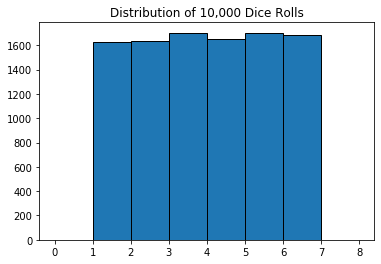

In [42]:
# using random values to visualize a distribution
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0,9), edgecolor="black")
plt.title("Distribution of 10,000 Dice Rolls")
plt.show()

In [43]:
# .pmf - probability mass function - for discrete variables
# singular probability mass (percent chance) of discrete outcome
die_distribution.pmf(4)

0.16666666666666666

In [44]:
die_distribution.pmf([1, 3, 6])

array([0.16666667, 0.16666667, 0.16666667])

In [45]:
# .pdf - probability density function - for continuious variables


In [46]:
# .cdf - cumulative density function
# likelihood of certain outcome or all the results below it (i.e., <= )
die_distribution.cdf(4)

0.6666666666666666

In [47]:
# .ppf - percent point function - aka quantile function
# inverse of .cdf
# accepts a probability and returns the value associated with that probability
die_distribution.ppf(5/6)

5.0

In [48]:
# .sf - survival function - probability of a random variable taking on a value greater than a given point (i.e., > )
# what is the likelihood we roll greater than a 5 (i.e., 6 )
die_distribution.sf(5)

0.16666666666666663

In [49]:
# .isf - inverse survival function - returns a value given a probability
print(die_distribution.isf(.5))
print(die_distribution.isf(4/6))

3.0
2.0


### Binomial Distribution

>You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

In [50]:
n = 30 # questions; trials
p = .25 # four choices for each question

stats.binom(n, p).pmf(10)

0.09086524035782864

In [51]:
stats.binom(n, p).sf(10)

0.10572812269266013

> A binomial distribution with an n of 1 is referred to as a Bernoulli Distribution.

### Normal Distribution

Allows us to model a continuous random variable where the further away from the mean the less likely the outcome. Commonly referred to as a "bell curve"

Defined by mean and standard deviation. The **standard normal distribution** is a normal distribution with a mean of 0 and a standard deviation of 1

> Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

In [52]:
mean = 12_000
std = 2_000

stats.norm(mean, std).isf(.10) # top 10 percent

14563.103131089201

In [53]:
stats.norm(mean, std).ppf(.9) # 90th percentile

14563.103131089201

> How likely is it that the store sells less than 10,000 dollars one day?

In [54]:
stats.norm(mean, std).cdf(10_000)

0.15865525393145707

### Poisson Distribution

> Codeup knows that, on average, students consume 5 lbs of coffee per week. How likely is it that the coffee consumption for this week is only 3 lbs?

In [55]:
stats.poisson(5).pmf(3)

0.1403738958142805

In [56]:
# more than 7 lbs
stats.poisson(5).sf(7)

0.13337167407000744

### Exercises

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    - What is the probability that no cars drive up in the noon hour?
    - What is the probability that 3 or more cars come through the drive through?
    - How likely is it that the drive through gets at least 1 car?

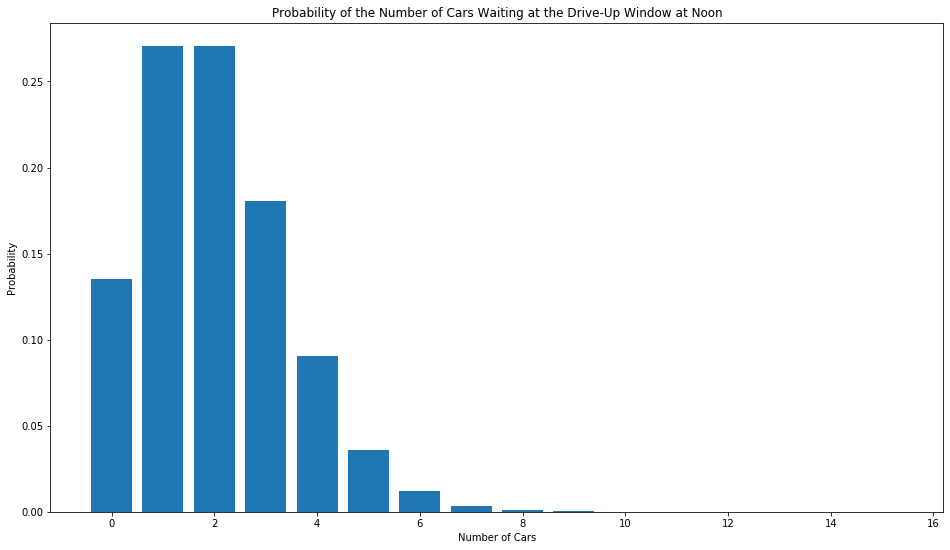

In [57]:
mean = 2

x = range(16)
y = stats.poisson(mean).pmf(x)

plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.title("Probability of the Number of Cars Waiting at the Drive-Up Window at Noon")
plt.xlabel("Number of Cars")
plt.ylabel("Probability")
plt.show()

In [58]:
# What is the probability that no cars drive up in the noon hour?
mean = 2

n_simulations = 10_000

simulation = (np.random.poisson(mean, size=(n_simulations)) == 0).mean() # simulation
theoretical = stats.poisson(mean).pmf(0) # theoretical

simulation, theoretical

(0.1315, 0.1353352832366127)

In [59]:
# What is the probability that 3 or more cars come through the drive through?
mean = 2

n_simulations = 10_000

simulation = (np.random.poisson(mean, size=(n_simulations)) >= 3).mean() # simulation
theoretical = stats.poisson(mean).sf(2) # theoretical

simulation, theoretical

(0.3249, 0.32332358381693654)

In [60]:
# How likely is it that the drive through gets at least 1 car?
mean = 2

n_simulations = 10_000

simulation = (np.random.poisson(mean, size=(n_simulations)) > 0).mean() # simulation
theoretical = stats.poisson(mean).sf(0) # theoretical

simulation, theoretical

(0.8645, 0.8646647167633873)

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

In [61]:
# What grade point average is required to be in the top 5% of the graduating class?
mean = 3.0
std = .3

n_simulations = 10_000

simulation = np.percentile(np.random.normal(mean, std, size=(n_simulations)), 95)
theoretical = stats.norm(mean, std).isf(.05)
              
simulation, theoretical

(3.505899924086162, 3.4934560880854417)

In [62]:
# What GPA constitutes the bottom 15% of the class?
mean = 3.0
std = .3

n_simulations = 10_000

simulation = np.percentile(np.random.normal(mean, std, size=(n_simulations)), 15)
theoretical = stats.norm(mean, std).isf(.85)

simulation, theoretical

(2.694608780712696, 2.689069983151863)

In [63]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# Determine the range of the third decile.
mean = 3.0
std = .3

n_simulations = 10_000

simulation = np.random.normal(mean, std, size=(n_simulations))
theoretical = stats.norm(mean, std)

simulated_first_decile = np.percentile(simulation, 10)
simulated_second_decile = np.percentile(simulation, 20)
simulated_third_decile = np.percentile(simulation, 30)

theoretical_first_decile = theoretical.ppf(.1)
theoretical_second_decile = theoretical.ppf(.2)
theoretical_third_decile = theoretical.ppf(.3)

print(f"""The simulated range of the third decile is {simulated_second_decile} to {simulated_third_decile}.
The theoretical range of the third decile is {theoretical_second_decile} to {theoretical_third_decile}.""")

The simulated range of the third decile is 2.7500145961417894 to 2.843223469447531.
The theoretical range of the third decile is 2.7475136299281258 to 2.842679846187588.


In [64]:
# Would a student with a 2.8 grade point average qualify for this scholarship in a simulated experiment?
student_gpa = 2.8

if student_gpa >= simulated_second_decile and student_gpa <= simulated_third_decile:
    print(f"A student with a {student_gpa} GPA would qualify for the scholarship in a simulated experiment.")
else:
    print(f"A student with a {student_gpa} GPA would not qualify for the scholarship in a simulated experiment.")

A student with a 2.8 GPA would qualify for the scholarship in a simulated experiment.


In [65]:
# Theoretically, would a student with a 2.8 grade point average qualify for this scholarship?
student_gpa = 2.8

if student_gpa >= theoretical_second_decile and student_gpa <= theoretical_third_decile:
    print(f"Theoretically, a student with a {student_gpa} GPA would qualify for the scholarship.")
else:
    print(f"Theoretically, a student with a {student_gpa} GPA would not qualify for the scholarship.")

Theoretically, a student with a 2.8 GPA would qualify for the scholarship.


In [66]:
# If I have a GPA of 3.5, what percentile am I in?
mean = 3.0
std = .3

n_simulations = 10_000

simulation = (np.random.normal(mean, std, size=(n_simulations)) >= 3.5).mean()
theoretical = stats.norm(mean, std).sf(3.5)

simulation, theoretical

(0.0459, 0.0477903522728147)

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [67]:
n = 4_326 # visitors
p = .02 # average click-through rate

n_simulations = 10_000

simulation = (np.random.binomial(n, p, size=(n_simulations)) >= 97).mean()
theoretical = stats.binom(n, p).sf(96)

simulation, theoretical

(0.1337, 0.1397582363130086)

---
# Hypothesis Testing

- alpha: 1 - confidence level (95%, 99%, 99.9% are typical confidence levels)
- P-value: probability we observe the results (or more extreme results) given that the null hypothesis is true

### Central Limit Theorem (CTL)
- The mean of random samples of the same size from a population will result in a sampling distribution that is **normal** regardless of the inital distribution of the population

- In hypothesis testing, the assumption is that our data is from a normal distribution.

- According to the CLT, we can work with skewed real-world data distributions, assume our sample data is normally distributed, and conduct our hypothesis tests.

### T-Test
- Continuous v. Categorical

### Exercises

- Load the mpg dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?

In [68]:
mpg = data("mpg")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


$H_0$: There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: There is a difference in fuel-efficiency in cars from 2008 vs 1999

In [69]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# two sample
alpha = .05 # 95% confidence

sample_2008 = mpg[mpg.year == 2008].hwy
sample_1999 = mpg[mpg.year == 1999].hwy

tstat, p = stats.ttest_ind(sample_2008, sample_1999)
print("t =", tstat)
print("p =", p)

if p < alpha:
    print(f"Reject null hypothesis - p ({p:.11f}) < alpha {alpha}")
else:
    print(f"Fail to reject null hypothesis - p ({p:.11}) > alpha {alpha}")

t = 0.03286431672888292
p = 0.9738110448529322
Fail to reject null hypothesis - p (0.97381104485) > alpha 0.05


$H_0$: There is no difference in fuel-efficiency in cars from 2008 vs the population

$H_a$: There is a difference in fuel-efficiency in cars from 2008 vs the population

In [70]:
# Is there a difference in fuel-efficiency in cars from 2008 vs the population?
# one sample
alpha = .05 # 95% confidence

sample_2008 = mpg[mpg.year == 2008].hwy

tstat, p = stats.ttest_1samp(sample_2008, mpg["hwy"].mean())
print("t =", tstat)
print("p =", p)

if p < alpha:
    print(f"Reject null hypothesis - p ({p:.11f}) < alpha {alpha}")
else:
    print(f"Fail to reject null hypothesis - p ({p:.11}) > alpha {alpha}")

t = 0.023713556344048085
p = 0.9811218369949581
Fail to reject null hypothesis - p (0.98112183699) > alpha 0.05


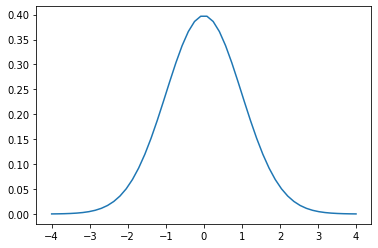

In [71]:
# plotting
degf = sample_2008.shape[0] - 1

x = np.linspace(-4, 4)
y = stats.t(degf).pdf(x)

plt.plot(x, y)
plt.show()

$H_0$: There is no difference in fuel-efficiency between compact cars and the average car

$H_a$: There is a difference in fuel-efficiency between compact cars and the average car

In [72]:
# Are compact cars more fuel-efficient than the average car?
# one sample
alpha = .05 # 95% confidence

compact_cars = mpg[mpg["class"] == "compact"].hwy
pop_mean = mpg["hwy"].mean()

tstat, p = stats.ttest_1samp(compact_cars, pop_mean)
print("t =", tstat)
print("p =", p)

if p < alpha:
    print(f"Reject null hypothesis - p ({p:.11f}) < alpha {alpha}")
else:
    print(f"Fail to reject null hypothesis - p ({p:.11}) > alpha {alpha}")


t = 8.806470666529446
p = 1.9716962312411042e-11
Reject null hypothesis - p (0.00000000002) < alpha 0.05


### Correlation
- Continuous v. Continuous
- Used to check if two samples are related

#### Pearson's Correlation Coefficient
- Goal of test to answer: Do two samples have a linear relationship?
- $H_0$ for correlations tests is that there is **no** linear relationship between two variables

### Exercises

$H_0$: There is no linear relationship between average mileage and cylinders of a vehicle.

$H_a$: There is a linear relationship between average mileage and cylinders of a vehicle.

In [73]:
mpg["avg_mileage"] = (mpg.cty + mpg.hwy) / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [74]:
alpha = .01

r, p = stats.pearsonr(mpg.avg_mileage, mpg.cyl)
print("r =", r)
print("p =", p)

if p < alpha:
    print(f"Reject null hypothesis - p ({p}) < alpha {alpha}")
else:
    print(f"Fail to reject null hypothesis - p ({p}) > alpha {alpha}")

r = -0.7886909224047056
p = 6.387070246026389e-51
Reject null hypothesis - p (6.387070246026389e-51) < alpha 0.01


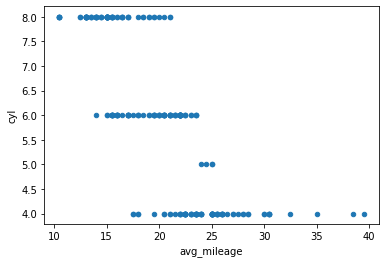

In [75]:
mpg.plot.scatter(x="avg_mileage", y="cyl")
plt.show()

### Chi2
- Used to compare two categorical variables

#### Contingency Table Test

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

$H_0$: Macbook utilization and Codeup student status are independent of each other

$H_a$: Macbook utilization and Codeup student status are dependent on each other

In [76]:
index = ["Uses a Macbook", "Doesn't Use A Macbook"]
columns = ["Codeup Student", "Not Codeup Student"]

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [77]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print("chi2 =", r)
print("p =", p)
print("degf =", degf)
print("expected =", expected)

chi2 = -0.7886909224047056
p = 1.4116760526193828e-09
degf = 1
expected = [[34.5 34.5]
 [15.5 15.5]]


### More Examples

$H_0$: Sex is independent of whether or not someone is a smoker

In [78]:
tips = data("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [79]:
observed = pd.crosstab(tips.sex, tips.smoker)
observed

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [80]:
alpha = .01

chi2, p, degf, expected = stats.chi2_contingency(observed)
print("chi2 =", chi2)
print("p =", p)
print("degf =", degf)
print("expected =", expected)

if p < alpha:
    print(f"Reject null hypothesis - p ({p:.3}) < alpha ({alpha})")
else:
    print(f"Fail to reject null hypothesis - p ({p:.3}) > alpha ({alpha})")

chi2 = 0.008763290531773594
p = 0.925417020494423
degf = 1
expected = [[53.84016393 33.15983607]
 [97.15983607 59.84016393]]
Fail to reject null hypothesis - p (0.925) > alpha (0.01)


---
$H_0$: There is no linear correlation between the total bill and the tip amount

In [81]:
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [82]:
alpha = .01

r, p = stats.pearsonr(tips.total_bill, tips.tip)
print("r =", r)
print("p =", p)

if p < alpha:
    print(f"Reject null hypothesis - p ({p:.3}) < alpha ({alpha})")
else:
    print(f"Fail to reject null hypothesis - p ({p:.3}) > alpha ({alpha})")

r = 0.6757341092113645
p = 6.692470646863477e-34
Reject null hypothesis - p (6.69e-34) < alpha (0.01)


---
$H_0$: The average bill for smokers is no different than the population mean

In [83]:
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [84]:
alpha = .01

smokers = tips[tips.smoker == "Yes"].total_bill
mean = tips.total_bill.mean()

tstat, p = stats.ttest_1samp(smokers, mean)
print("tstat =", tstat)
print("p =", p)

if p < alpha:
    print(f"Reject null hypothesis - p ({p:.3}) < alpha ({alpha})")
else:
    print(f"Fail to reject null hypothesis - p ({p:.3}) > alpha ({alpha})")

tstat = 0.951796790928544
p = 0.3436939512284921
Fail to reject null hypothesis - p (0.344) > alpha (0.01)


---
$H_0$: The average size of the tip left by parties of 2 and parties of 4 is the same.

In [85]:
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [86]:
alpha = .01

two_tops = tips[tips["size"] == 2].tip
four_tops = tips[tips["size"] == 4].tip

tstat, p = stats.ttest_ind(two_tops, four_tops)
print("tstat =", tstat)
print("p =", p)

if p < alpha:
    print(f"Reject null hypothesis - p ({p:.3}) < alpha ({alpha})")
else:
    print(f"Fail to reject null hypothesis - p ({p:.3}) > alpha ({alpha})")

tstat = -7.462130391296251
p = 2.924028981378475e-12
Reject null hypothesis - p (2.92e-12) < alpha (0.01)
